### Importing the libraries and the dataset

> Dataset description:
* mpg - The fuel economy of the car in terms of miles travelled per gallon of gasoline
* cylinders - The number of cylinders in the car's engine
* displacement - The volume of air displaced by all the pistons of a piston engine
* horsepower - Horsepower is a measure of power the engine produces
* weight - The total weight of the car
* acceleration - The time in seconds it takes for the car to reach 60 miles per hour
* model year - The year (in the 20th century) the car model was released. For example 80 means the car was released in 1980.
* origin - The region where the car was manufactured: 1 = USA, 2 = Europe 3 = Japan
* car name - The name of the car model.

In [122]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [123]:
# Reading the dataset

auto_db = pd.read_csv('/content/drive/MyDrive/04 Progetto Base Assirelli Michele/Regressore/auto-mpg.csv')

auto_db.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [124]:
# Removing from the datasets the car name column since it wont be useful for linear regression
auto_db = auto_db.drop(['car name'], axis=1)

### Data cleaning process

In [125]:
auto_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [126]:
# The origin column should be objet and not numeric
# The horsepower column should be integer and not object

auto_db['origin'] = auto_db['origin'].astype('object')

In [127]:
# Since i get an error transforming the horsepower datatype lets see what are the values inside this column

auto_db['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [128]:
auto_db[auto_db['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [129]:
# Since we have only 6 rows with "?" we can safely replace that value with the mean of the column

auto_db['horsepower'] = np.where(auto_db['horsepower']=='?',0,auto_db['horsepower'])

auto_db['horsepower'] = auto_db['horsepower'].astype('int')

auto_db['horsepower'] = np.where(auto_db['horsepower']==0,int(auto_db['horsepower'].mean()),auto_db['horsepower'])

In [130]:
# Let's check for any evident outlier

auto_db.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.432161,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.200375,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Exploratory data analysis

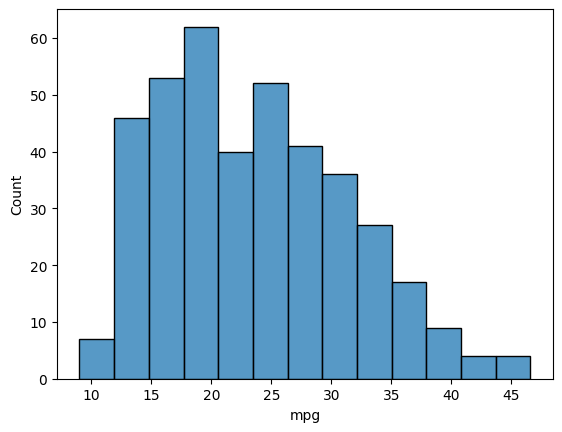

In [131]:
# Lets see the histogram for out target variable
# The distribution looks a bit right-skewed
# We will evaluate the possibility of applying a log transformation to our target in order to have a more normally distribuited variable

sns.histplot(auto_db['mpg']);

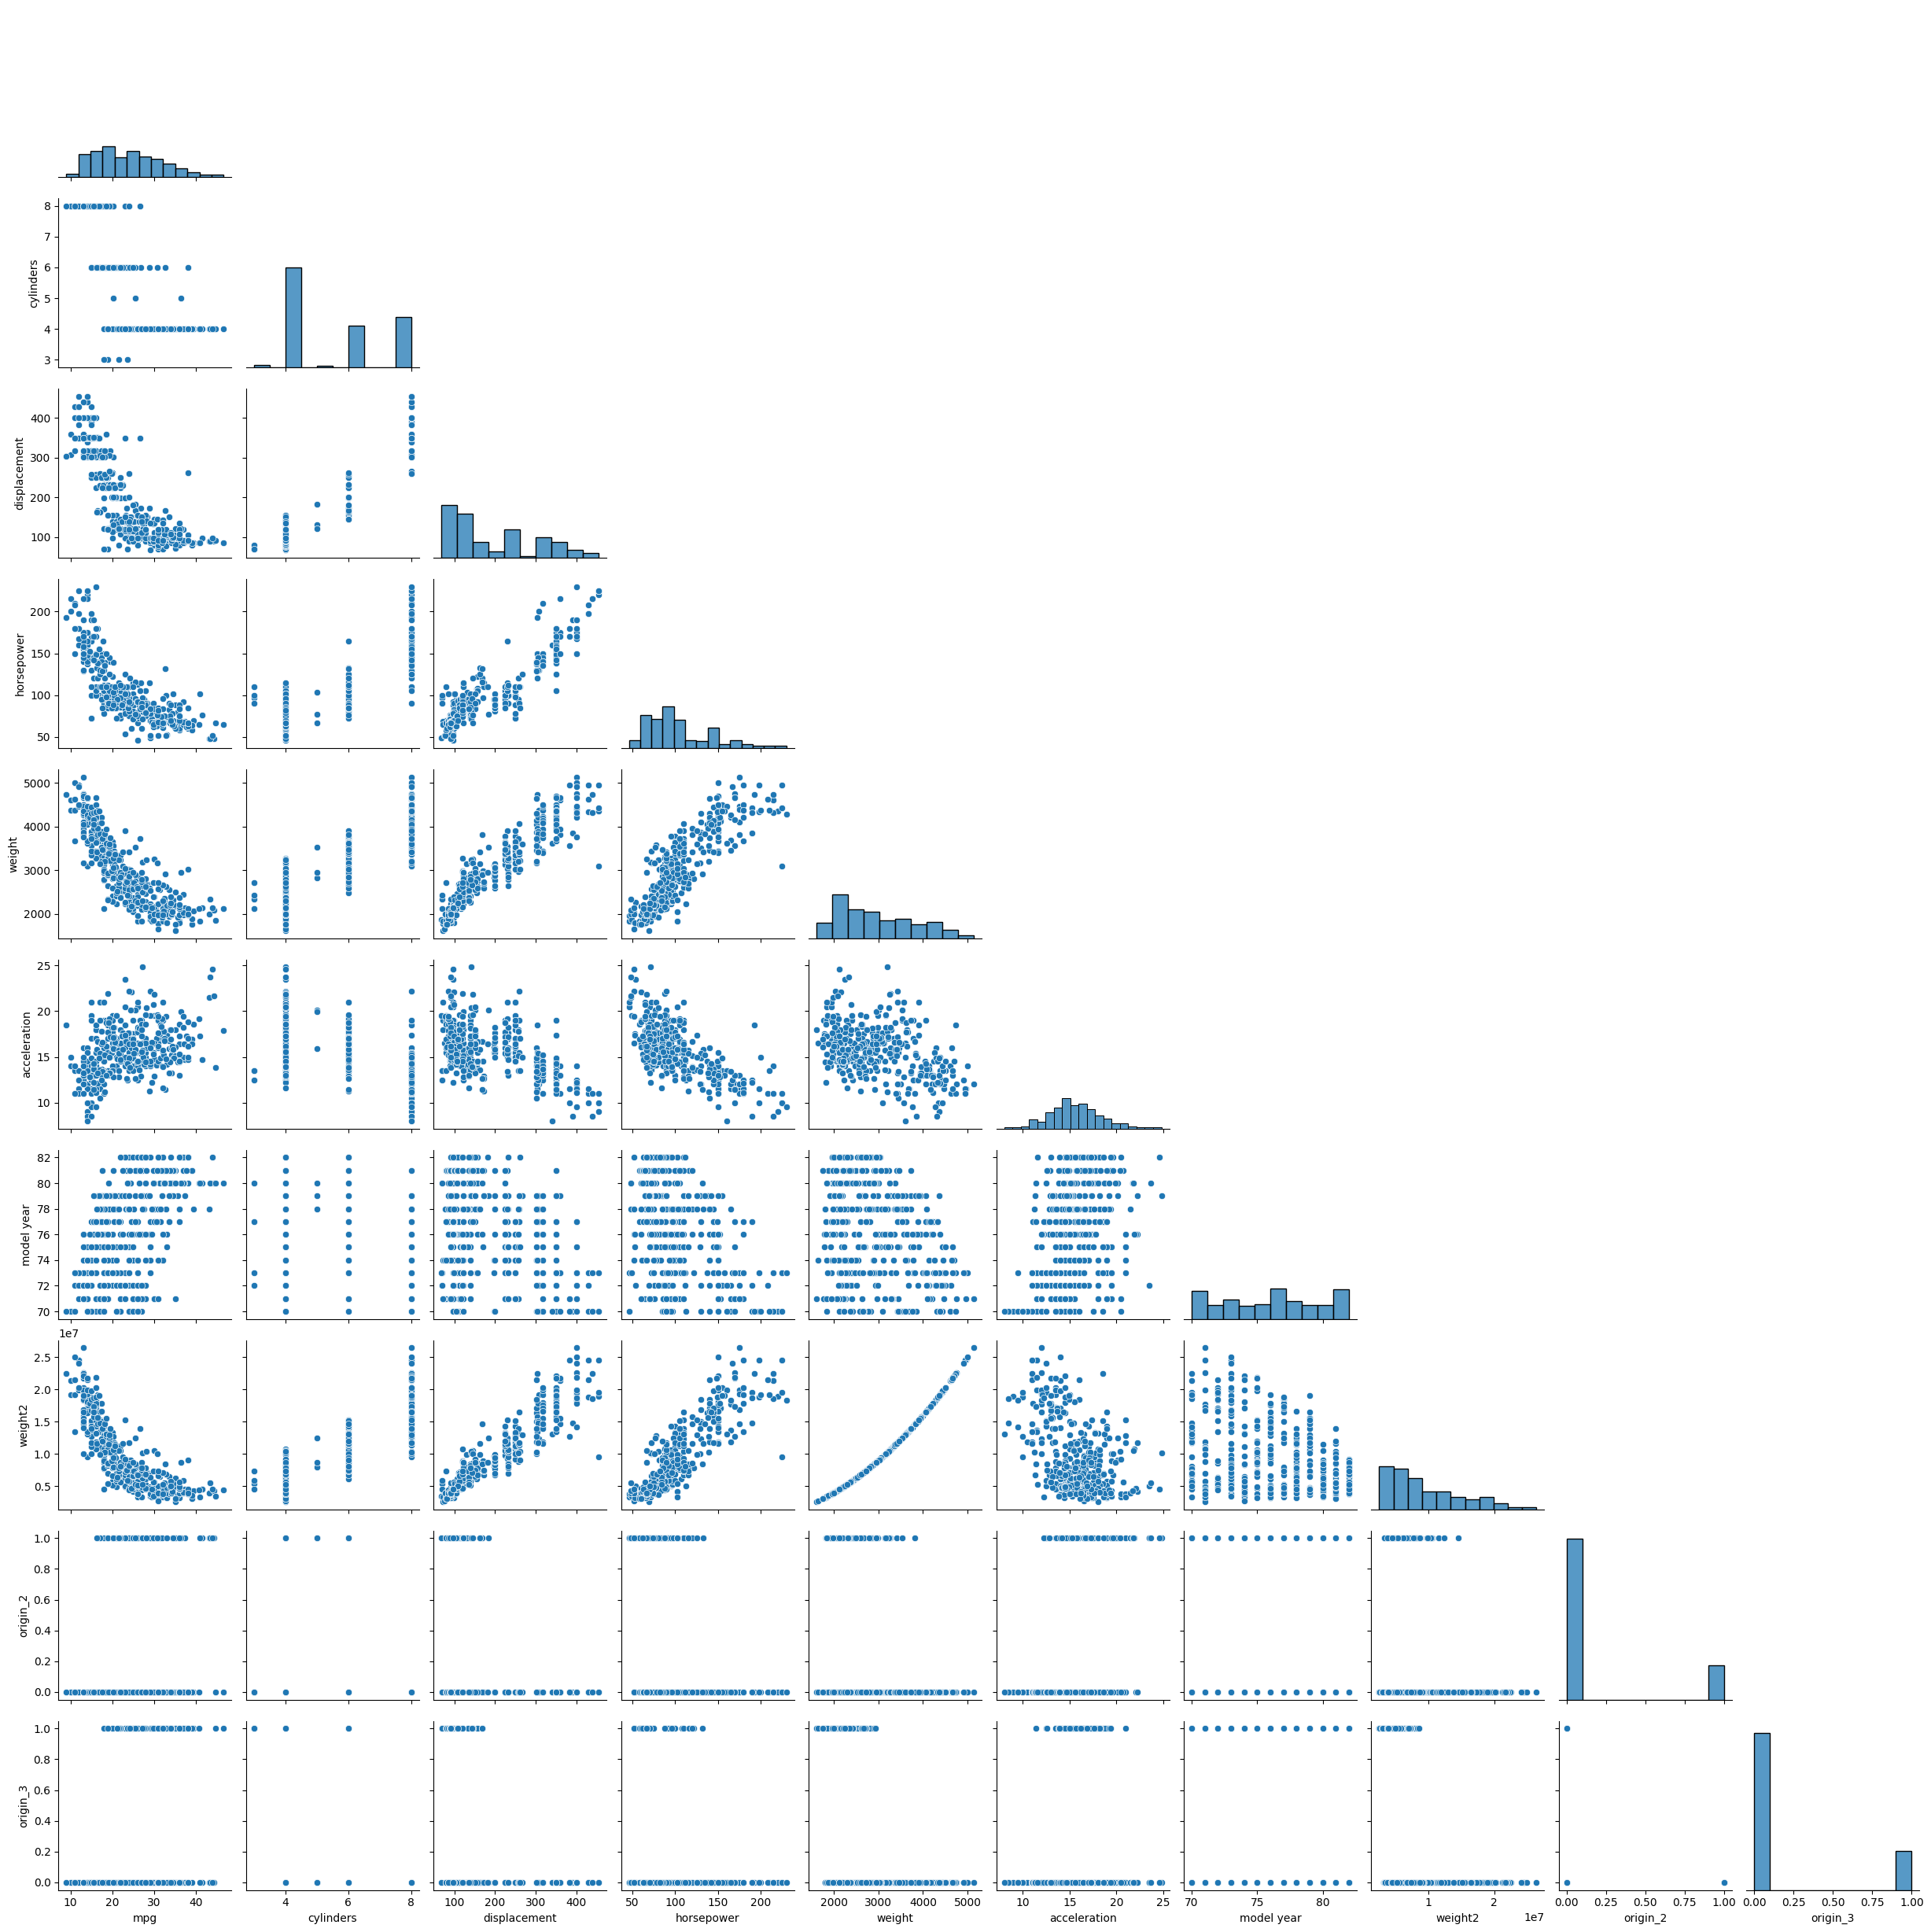

In [166]:
# Let's explore the feature/target relations using a pairplot
# We can see many feature be correlated with polynomial terms
sns.pairplot(auto_db, corner=True);

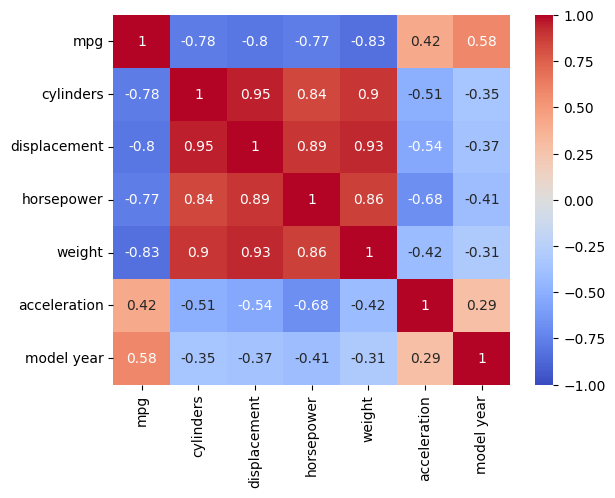

In [133]:
sns.heatmap(auto_db.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='coolwarm');

# The most correlated feature is the weight which has a negative correlation
# We also have many other feature correlated with our target but they are also correlated with each other so we will have to be careful about multicollinearity issues

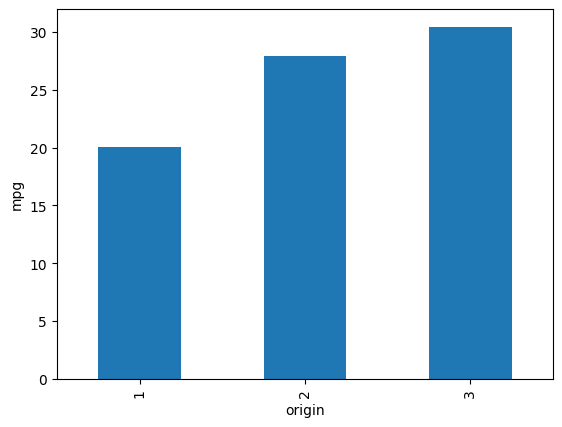

In [134]:
# Finally let's explore the relation between our categorical feature and the target

columns = ['origin']

for column in columns:
    auto_db.groupby(column)['mpg'].mean().plot.bar()
    plt.ylabel('mpg')
    plt.show

### Univariate regression model


In [135]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_absolute_percentage_error as mape

features = ['weight']

X = sm.add_constant(auto_db[features])
y = auto_db["mpg"]

# Test Split
X, X_test, y, y_test = train_test_split(X,y, train_size=0.2, random_state=2024)

# Fitting the model
model = sm.OLS(y, X).fit()

# Evaluating the performance on the train

print('Univariate Regression Model performance:')
print('Train R2: ', round(r2(y, model.predict(X)),4))
print('Train MAE: ', round(mae(y, model.predict(X)),4))
print('Train MAPE: ', round(mape(y, model.predict(X)),4)*100, '%')

Univariate Regression Model performance:
Train R2:  0.7324
Train MAE:  3.8189
Train MAPE:  16.73 %


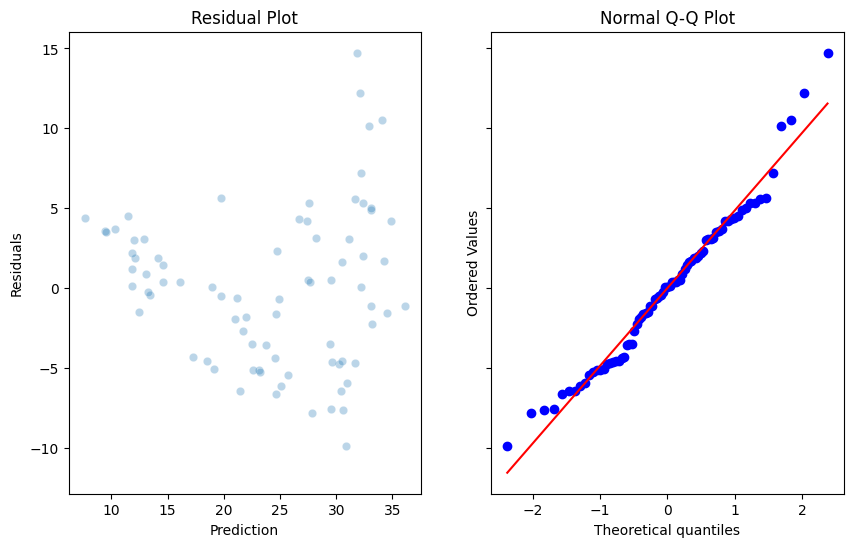

In [136]:
# Residual plotter helper function

def residual_analysis_plots(model):

    import scipy.stats as stats
    import matplotlib.pyplot as plt

    predictions = model.predict()
    residuals = model.resid

    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))

    sns.scatterplot(x=predictions, y=residuals, ax=ax[0], alpha=.3)
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")

    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")

residual_analysis_plots(model)

# The Q-Q plot is looking fine since all the point between -2 and +2 std dev are near the line
# The residual plot is looking fine till around 30 mpg where the spread of error gets wider. I would not trust the model over that value of mpg

### Feature engineering

In [137]:
# Let's try by adding some polynomial terms and dummy variables
auto_db = auto_db.assign(
    weight2 = auto_db['weight']**2)

auto_db = pd.get_dummies(auto_db, columns=['origin'], drop_first=True)

# Lets convert the boolean column in numeric
for col in auto_db.select_dtypes(['bool']).columns:
    auto_db[col] = auto_db[col].astype('int64')

auto_db

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,12278016,0,0
1,15.0,8,350.0,165,3693,11.5,70,13638249,0,0
2,18.0,8,318.0,150,3436,11.0,70,11806096,0,0
3,16.0,8,304.0,150,3433,12.0,70,11785489,0,0
4,17.0,8,302.0,140,3449,10.5,70,11895601,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,7784100,0,0
394,44.0,4,97.0,52,2130,24.6,82,4536900,1,0
395,32.0,4,135.0,84,2295,11.6,82,5267025,0,0
396,28.0,4,120.0,79,2625,18.6,82,6890625,0,0


### Multivariate linear regression

In [138]:
# Lets train again the model adding more features

features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'weight2', 'origin_2', 'origin_3']

X = sm.add_constant(auto_db[features])
y = auto_db['mpg']

# Test Split
X, X_test, y, y_test = train_test_split(X,y, train_size=0.2, random_state=2024)

# Fitting the model
model = sm.OLS(y, X).fit()

# Evaluating the performance on the train

print('Train R2: ', round(r2(y, model.predict(X)),4))
print('Train MAE: ', round(mae(y, model.predict(X)),4))
print('Train MAPE: ', round(mape(y, model.predict(X)),4)*100, '%')

Train R2:  0.8976
Train MAE:  2.204
Train MAPE:  9.51 %


In [139]:
model.summary()

# We are able to see that any feature are not relevant since P>|t| is higher than 0.05
# We will retrain the model removing those feature which also helps avoid multicollinearity


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     67.17
Date:                Tue, 10 Sep 2024   Prob (F-statistic):           1.30e-30
Time:                        21:12:29   Log-Likelihood:                -198.19
No. Observations:                  79   AIC:                             416.4
Df Residuals:                      69   BIC:                             440.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.1353     12.277      0.663      0.510     -16.357      32.627
cylinders       -0.5264      0.841     -0.626      0.534      -2.205       1.152
displacement     0.0225      0.016      1.379      0.172      -0.010       0.055
horsepower      -0.0261      0.028     -0.918      0.362      -0.083       0.031
weight          -0.0281      0.004     -7.433      0.000      -0.036      -0.021
acceleration     0.0479      0.227      0.211      0.834      -0.405       0.501
model year       0.8713      0.121      7.194      0.000       0.630       1.113
weight2       3.378e-06   5.54e-07      6.101      0.000    2.27e-06    4.48e-06
origin_2         3.1305      1.395      2.245      0.028       0.348       5.913
origin_3         2.7881      1.335      2.088      0.041       0.124       5.452
==============================================================================
Omnibus:                       13.410   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.727
Skew:                           0.716   Prob(JB):                     8.58e-05
Kurtosis:                       4.907   Cond. No.                     4.04e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
# Lets train again the model adding more features

features = ['weight', 'model year', 'weight2', 'origin_2', 'origin_3']

X = sm.add_constant(auto_db[features])
y = auto_db['mpg']

# Test Split
X, X_test, y, y_test = train_test_split(X,y, train_size=0.2, random_state=2024)

# Fitting the model
model = sm.OLS(y, X).fit()

# Evaluating the performance on the train

print('Train R2: ', round(r2(y, model.predict(X)),4))
print('Train MAE: ', round(mae(y, model.predict(X)),4))
print('Train MAPE: ', round(mape(y, model.predict(X)),4)*100, '%')

Train R2:  0.8938
Train MAE:  2.2053
Train MAPE:  9.22 %


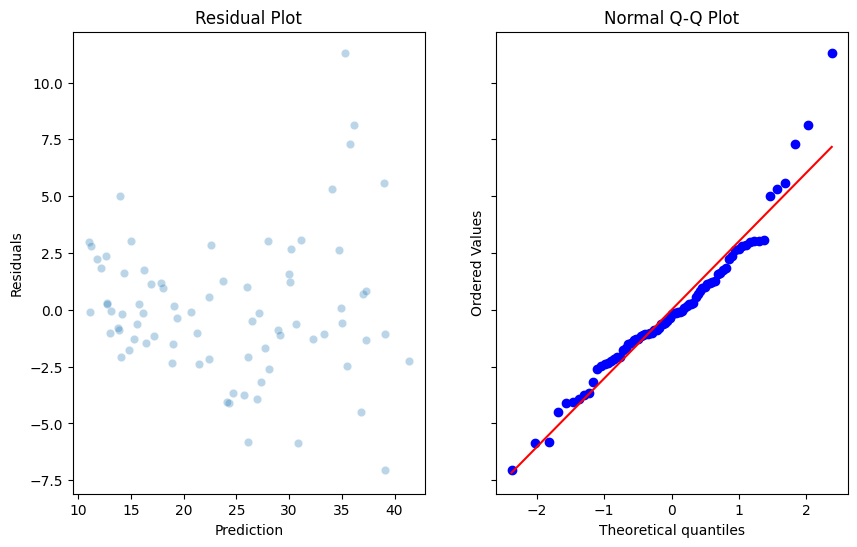

In [142]:
# Residual plotter helper function

residual_analysis_plots(model)

# The plot graph looks better than before but still with mpg over 30 we have a wide spread of error
# Lets try by adding a log transformation to our target variable

In [143]:
# Lets train using log transformation on our target

features = ['weight', 'model year', 'weight2', 'origin_2', 'origin_3']

X = sm.add_constant(auto_db[features])
y = np.log(auto_db['mpg'])

# Test Split
X, X_test, y, y_test = train_test_split(X,y, train_size=0.2, random_state=2024)

# Fitting the model
model = sm.OLS(y, X).fit()

# Evaluating the performance on the train

print('Model performance after applying log transformation to our target')
print('Train R2: ', round(r2(y, model.predict(X)),4))
print('Train MAE: ', round(np.exp(mae(y, model.predict(X))),4))
print('Train MAPE: ', round(mape(y, model.predict(X)),4)*100, '%')

Model performance after applying log transformation to our target
Train R2:  0.9324
Train MAE:  1.0832
Train MAPE:  2.58 %


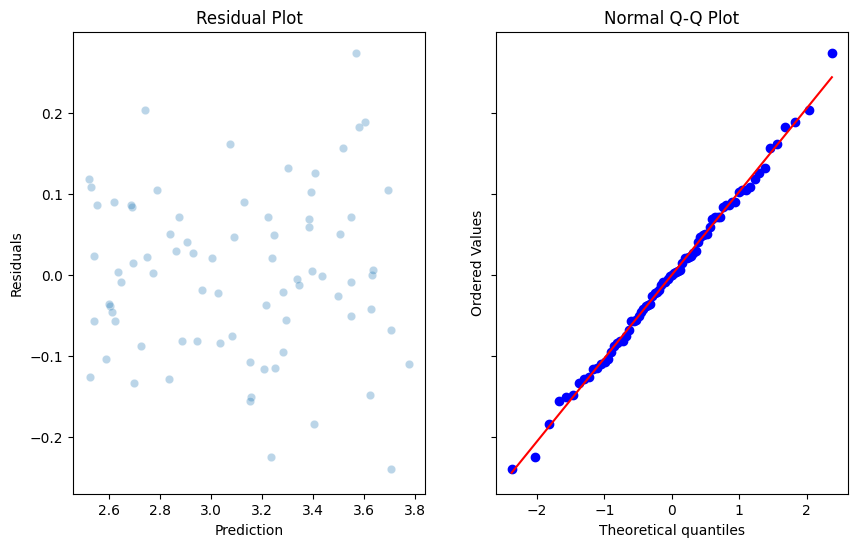

In [145]:
residual_analysis_plots(model)

# This time the residual looks much better

In [146]:
# Outliers evaluation with Cook's distance

influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head(2)

# We have Cooks distance < 0.5 so we dont have any significant problems with ourliers

,dfb_const,dfb_weight,dfb_model year,dfb_weight2,dfb_origin_2,dfb_origin_3,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
59,-0.154223,0.013743,0.166629,0.002504,-0.212948,0.027626,0.025605,-1.155379,0.103208,-0.391955,-1.158075,-0.392870
62,-0.013418,-0.000556,0.018756,-0.004784,0.002275,-0.004307,0.000913,-0.370386,0.038418,-0.074033,-0.368186,-0.073594


### Evaluating performance on test data

In [147]:
print('Test model R2 performance:', round(r2(y_test, model.predict(X_test)),4))
print('Test model MAE performance:', round(np.exp(mae(y_test, model.predict(X_test))),4))
print('Test model MAPE performance: ', round(mape(y_test, model.predict(X_test)),4)*100, '%')

Test model R2 performance: 0.8542
Test model MAE performance: 1.1004
Test model MAPE performance:  3.15 %


### Ridge, Lasso and Elastic Net Regression Model

In linear regression the cost function $J$ is just the sum of the squared errors (SSE)

Linear Regression: $J = SSE$

With regularized regression model we add a regularization term $\alpha$ to shrink the model coefficients $\beta$. The idea is that the the features that reduce SSE the most will shrink at a slower rate than the less useful ones

Ridge Regression: $J = SSE + \alpha \sum_{j=1}^{p}\beta^2_j$ <br>
Lasso Regression: $J = SSE + \alpha \sum_{j=1}^{p}|\beta_j|$

Elastic Net combines both Ridge and Lasso into a single model adding the hyperparameter $\lambda$ that control the balance beetwen them

In [148]:
# Lets start by standardize our dataset

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_norm = std.fit_transform(X.values)
X_test_norm = std.fit(X_test.values)

In [149]:
# Ridge Regression
from sklearn.linear_model import RidgeCV

n_alphas=200
alphas = 10 ** np.linspace(-4, 4, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)
ridge_model.fit(X_norm, y)

print('Best Alpha: ', ridge_model.alpha_)
print('Train R2: ', round(ridge_model.score(X_norm, y),4))
print('Train MAE: ', round(np.exp(mae(y, ridge_model.predict(X_norm))),4))
print('Train MAPE: ', round(mape(y, ridge_model.predict(X_norm)),4)*100, '%')

# The performance of a Ridge model are the same of the linear regression and we can imagine because the best alfa fitted is the lowest that the model tried
# Since the Ridge Regression does not improve the performance i would stick with a regular regression model which has more interpretability

Best Alpha:  0.0001
Train R2:  0.9324
Train MAE:  1.0832
Train MAPE:  2.58 %


In [150]:
# Lasso Regression
from sklearn.linear_model import LassoCV

lasso_model = LassoCV(alphas=alphas, cv=5)
lasso_model.fit(X_norm, y)

print('Best Alpha: ', lasso_model.alpha_)
print('Train R2: ', round(lasso_model.score(X_norm, y),4))
print('Train MAE: ', round(np.exp(mae(y, lasso_model.predict(X_norm))),4))
print('Train MAPE: ', round(mape(y, lasso_model.predict(X_norm)),4)*100, '%')

# Same as Ridge Regression
# Lasso is not improving performance so there is no reason to use it over simple linear regression

Best Alpha:  0.0001
Train R2:  0.9324
Train MAE:  1.0829
Train MAPE:  2.5700000000000003 %


In [151]:
# Elastic Net

from sklearn.linear_model import ElasticNetCV

l1_ratios = [x * 0.1 for x in range(1,10)]

elastic_net_model = ElasticNetCV(alphas=alphas, l1_ratio = l1_ratios, cv=5)
elastic_net_model.fit(X_norm, y)

print('Best Alpha: ', elastic_net_model.alpha_)
print('Best Lambda: ', elastic_net_model.l1_ratio_)
print('Train R2: ', round(elastic_net_model.score(X_norm, y),4))
print('Train MAE: ', round(np.exp(mae(y, elastic_net_model.predict(X_norm))),4))
print('Train MAPE: ', round(mape(y, elastic_net_model.predict(X_norm)),4)*100, '%')

# No improvement from Elastic Net so overall the best model is just a simple linear regression

Best Alpha:  0.0001
Best Lambda:  0.1
Train R2:  0.9324
Train MAE:  1.083
Train MAPE:  2.5700000000000003 %


## Deep Neural Network Model

In [152]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from sklearn.preprocessing import MinMaxScaler

In [153]:
X = auto_db.drop(['mpg'], axis=1)
y = auto_db["mpg"]

# Test Split
X, X_test, y, y_test = train_test_split(X,y, train_size=0.2, random_state=2024)

In [154]:
#Faccio lo scaling dei dati
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [161]:
#Definiamo la rete neurale
def get_model():
  model = Sequential()
  model.add(InputLayer(shape=(X.shape[1],)))                        #Strato di input con il numero di neuroni pari al numero di feature
  model.add(Dense(10, activation='relu', name='hidden_layer_1'))
  model.add(Dense(1, activation='relu', name='output_layer'))       #Strato di output con 1 neurone di output e funzione relu visto che facciamo regressione
  model.compile(loss='mean_absolute_percentage_error')
  return model

In [162]:
model = get_model()
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)               │ (None, 10)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

In [163]:
# Addestriamo il modello

history = model.fit(X,y,validation_data=(X_test, y_test),epochs=100,verbose=0, batch_size=1)

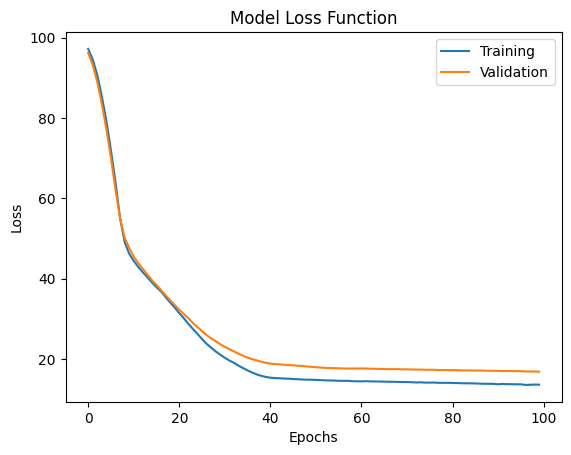

In [164]:
#Plottiamo i risultati
plt.plot(history.history['loss'], label='Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Function')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()